In [6]:
# install sentence transformers for sentence embeddings
!pip install -U sentence-transformers

In [7]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

In [8]:
# load menu dataset
menu_df = pd.read_csv('MenuItem.csv')
menu_df.head(5)

,Restaurant Name,Original food Item
0,Coffee Time,Garden Vegetable Sandwich
1,HoSan,Roasted Seaweed Snack
2,Weight Watchers,Muffins
3,Natural Sea,"Albacore Tuna, Solid White"
4,World of Beer,Caesar Salad with Grilled Flat Iron Steak


In [9]:
# renaming the columns for easier access
menu_df.rename(columns={'Restaurant Name': 'Restaurant', 'Original food Item': 'Food_items'}, inplace=True)
menu_df.head(5)

,Restaurant,Food_items
0,Coffee Time,Garden Vegetable Sandwich
1,HoSan,Roasted Seaweed Snack
2,Weight Watchers,Muffins
3,Natural Sea,"Albacore Tuna, Solid White"
4,World of Beer,Caesar Salad with Grilled Flat Iron Steak


In [10]:
# check for nullls
menu_df.isnull().sum(axis = 0)

Restaurant    0
Food_items    0
dtype: int64

Removing the punctuations in the Menu column, so that the Group By function properly aggregates food items of a restaurant in the next steps 

In [11]:
# before regex 
menu_df.loc[menu_df['Restaurant'] == "241 Pizza"]

,Restaurant,Food_items
35,241 Pizza,"Bacon Cheeseburger Pizza, Medium Slice"
115,241 Pizza,"Meat Lovers Pizza, Small Slice"
188,241 Pizza,"BBQ Chicken Pizza, Medium Slice"
300,241 Pizza,"Meat Lovers Pizza, Large Slice"
306,241 Pizza,Garlic Bread with Cheese
371,241 Pizza,Ranch Dipping Sauce
703,241 Pizza,Cauliflower Pizza Crust
788,241 Pizza,"Meat Lovers Pizza, Medium Slice"
1105,241 Pizza,Potato Wedges
1119,241 Pizza,"Pepperoni Plant Based Pizza, Medium Slice"


In [12]:
# remove special characters like comma from the Food_items column
menu_df["Menu"] = menu_df['Food_items'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [13]:
# after regex
menu_df.loc[menu_df['Restaurant'] == "241 Pizza"]

,Restaurant,Food_items,Menu
35,241 Pizza,"Bacon Cheeseburger Pizza, Medium Slice",Bacon Cheeseburger Pizza Medium Slice
115,241 Pizza,"Meat Lovers Pizza, Small Slice",Meat Lovers Pizza Small Slice
188,241 Pizza,"BBQ Chicken Pizza, Medium Slice",BBQ Chicken Pizza Medium Slice
300,241 Pizza,"Meat Lovers Pizza, Large Slice",Meat Lovers Pizza Large Slice
306,241 Pizza,Garlic Bread with Cheese,Garlic Bread with Cheese
371,241 Pizza,Ranch Dipping Sauce,Ranch Dipping Sauce
703,241 Pizza,Cauliflower Pizza Crust,Cauliflower Pizza Crust
788,241 Pizza,"Meat Lovers Pizza, Medium Slice",Meat Lovers Pizza Medium Slice
1105,241 Pizza,Potato Wedges,Potato Wedges
1119,241 Pizza,"Pepperoni Plant Based Pizza, Medium Slice",Pepperoni Plant Based Pizza Medium Slice


In [14]:
# drop the previous Food_items column which had punctuations
menu_df = menu_df.drop(columns=['Food_items'])
menu_df.head(5)

,Restaurant,Menu
0,Coffee Time,Garden Vegetable Sandwich
1,HoSan,Roasted Seaweed Snack
2,Weight Watchers,Muffins
3,Natural Sea,Albacore Tuna Solid White
4,World of Beer,Caesar Salad with Grilled Flat Iron Steak


In [15]:
# how many unique Restaurants are there
len(menu_df.Restaurant.unique())

341

In [16]:
# exploring number of distinct food items that a restaurant may have
menu_df.groupby('Restaurant').count()['Menu']

Restaurant
241 Pizza              45
A&W (Canada)           47
Amay's                  1
Ameci Pizza & Pasta    28
America's Taco Shop    39
                       ..
Yellow Tail             2
YoCream                38
Yogli Mogli            38
Yoshinoya              42
Zapata                  2
Name: Menu, Length: 341, dtype: int64

In [17]:
# combining all menu items of a particular restaurant in a single row
menu_list = menu_df.groupby('Restaurant')['Menu'].apply(list)
df = menu_list.reset_index(name = 'Menu')
df.head(5)

,Restaurant,Menu
0,241 Pizza,"[Bacon Cheeseburger Pizza Medium Slice, Meat L..."
1,A&W (Canada),"[Apple Juice 12 oz, Bacon Egger on Sesame See..."
2,Amay's,[Almond Cookies]
3,Ameci Pizza & Pasta,"[Large Ameci Deluxe Pizza, Chicken Caesar Sala..."
4,America's Taco Shop,"[Jack Cheese, Carne Asada Quesadilla Regular, ..."


Converting Menu column in the dataframe from list of strings to simple strings, so that the sentence embedding models can encode the text easily

In [18]:
# before string representation
df.Menu[29]

['Sweet Belgian Waffles', 'Belgian Waffles']

In [19]:
# converting the list of strings for a particular restaurant to a single string 
df["Menus"] = [' '.join(df.Menu[i]) for i in range(0,len(df['Menu']))]

In [20]:
# after string represtation
df.Menus[29]

'Sweet Belgian Waffles Belgian Waffles'

In [21]:
# create a list of all menus for all the restaurants
menus = list(df['Menus'])
menus

['Bacon Cheeseburger Pizza Medium Slice Meat Lovers Pizza Small Slice BBQ Chicken Pizza Medium Slice Meat Lovers Pizza Large Slice Garlic Bread with Cheese Ranch Dipping Sauce Cauliflower Pizza Crust Meat Lovers Pizza Medium Slice Potato Wedges Pepperoni Plant Based Pizza Medium Slice Chicken Club Pizza Medium Slice Chorizo Supreme Pizza Small Slice Chorizo Supreme Pizza Large Slice Pepperoni Pizza Large Slice Pepperoni Pizza Small Slice Jalapeno Hawaiian Pizza Large Slice Pepperoni Plant Based Pizza Large Slice BBQ Wings Hawaiian Pizza Large Slice Basil Pesto Pizza Small Slice Canadian Pizza Medium Slice Canadian Supreme Plant Based Pizza Large Slice Hawaiian Pizza Small Slice Canadian Supreme Plant Based Pizza Small Slice Bacon Cheeseburger Pizza Large Slice Veggie Sensation Pizza Small Slice Spicy Buffalo Dipping Sauce Jalapeno Hawaiian Pizza Medium Slice Veggie Sensation Pizza Large Slice Pepperoni Pizza Medium Slice Basil Pesto Pizza Medium Slice Hot Wings Chicken Club Pizza Small

**Sentence Embedding**

Given how small the dataset is, using a pre-trained model is preferable here. Hugging face has a lot of sentence embedding pre-trained models so I have compared the results of four pre-trained sentence-BERT embedding models: all-mpnet-base-v2, all-MiniLM-L6-v2, all-MiniLM-L12-v2 and all-distilroberta-v1.

In [22]:
# define the document embedding models to use for comparison
model_st1 = SentenceTransformer('all-mpnet-base-v2')
model_st2 = SentenceTransformer('all-MiniLM-L6-v2')
model_st3 = SentenceTransformer('all-MiniLM-L12-v2')
model_st4 = SentenceTransformer('all-distilroberta-v1')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.86k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/653 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [23]:
# generate sentence embeddings for each model
embeddings_st1 = model_st1.encode(menus)
embeddings_st2 = model_st2.encode(menus)
embeddings_st3 = model_st3.encode(menus)
embeddings_st4 = model_st4.encode(menus)

In [24]:
# check the embedding shape for all the embeddings generated
embeddings = [embeddings_st1, embeddings_st2, embeddings_st3, embeddings_st4]
for embedding in embeddings:
  print(embedding.shape)

(341, 768)
(341, 384)
(341, 384)
(341, 768)


In [25]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 4.7 MB/s 
     |████████████████████████████████| 1.1 MB 16.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=f9d55b1da5fa60437dbe252aa7012c96c3694920a7fcd72f656a9d183bbaf784
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=d2de3012cf71a5a99dfbfdc475fb0bca68fc9cbf0c0acebc64ff3cbc836b7a8c
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [26]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 7.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342200 sha256=1b9766703111f33e5cb88b2a93cd52072f999d6b94fb9122a5baef512fdc3d49
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [27]:
import umap
import hdbscan
import random
from tqdm.notebook import trange

**Dimensionality Reduction**

All of the sentence embeddings have high dimensionality (>300 features each). According to the Curse of Dimensionality, distance measures such as Euclidean and Manhattan, needed for clustering become meaningless at such high dimensions.

Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE. UMAP is much faster and more scalable than t-SNE, while also preserving the global structure of the data much better. This makes it useful for both visualization and as a preprocessing dimensionality reduction step to use before clustering.

https://umap-learn.readthedocs.io/en/latest/

UMAP has several hyperparameters, but n_neighbors and n_components are the two most important ones.

1. n_neighbors: This parameter controls how UMAP balances local versus global structure in the data. It does this by constraining the size of the local neighborhood UMAP will look at when attempting to learn the manifold structure of the data.

2. n_components: Allows the user to determine the dimensionality of the reduced dimension space after performing dimensionality reduction on the input data. 

**Clustering**

For this task, the number of clusters and size/density of each cluster is unknown, so Density-based clustering algorithms are a good option here as they do not require specifying the number of clusters and are indifferent to cluster shape. https://scikit-learn.org/stable/modules/clustering.html#

Hierarchical Density-Based Spatial Clustering of Applications with Noise (HDBSCAN) has become popular since it has fewer and more intuitive hyperparameters than DBSCAN and is robust to variable-density clusters.

https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html#comparing-python-clustering-algorithms

HDBSCAN has two important hyperparameters as follows:
1. min_samples: minimum number of neighbours to a core point. The higher this is, the more points are going to be discarded as noise/outliers. 

2. min_cluster_size: minimum size a final cluster can be. The higher this is, the bigger your clusters will be.

Here I will just be looking at min_cluster_size and using min_samples = min_cluster_size which is the default value.

In [28]:
def generate_clusters(message_embeddings,
                      n_neighbors,
                      n_components, 
                      min_cluster_size,
                      random_state = None):
    """
    Generate HDBSCAN cluster object after reducing embedding dimensionality with UMAP
    """
    # set the random seed state to a constant value to get consistent results for a given set of UMAP hyperparameters
    umap_embeddings = (umap.UMAP(n_neighbors=n_neighbors, 
                                n_components=n_components, 
                                metric='cosine', 
                                random_state=random_state)
                            .fit_transform(message_embeddings))

    clusters = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size).fit(umap_embeddings)

    return clusters

**Scoring**

Silhouette Score is not a good validation metric for density-based algorithms since it assumes all points are assigned a group and can’t appropriately handle noise/outliers.

 HDBSCAN has the following attribute:

*   probabilities_ : The strength with which each sample is a member of its assigned cluster. Noise points have probability zero; points in clusters have values assigned proportional to the degree that they persist as part of the cluster.

So this attribute can be used to derive the cost of the clustered group by defining the following objective: -

minimize (Cost = percent of dataset with < 5% cluster label confidence)

In [29]:
def score_clusters(clusters, prob_threshold = 0.05):
    """
    Returns the label count and cost of a given cluster supplied from running hdbscan
    """
    
    cluster_labels = clusters.labels_
    label_count = len(np.unique(cluster_labels))
    total_num = len(clusters.labels_)
    cost = (np.count_nonzero(clusters.probabilities_ < prob_threshold)/total_num)
    
    return label_count, cost

**Random Search**

Instead of doing a full grid search on the hyperparameter search space which might take a long time to run, performing a random search instead of a full grid search is an effective alternative strategy.

In [30]:
def random_search(embeddings, space, num_evals, label_lower, label_upper):
    """
    Randomly search hyperparameter space and limited number of times 
    , returns a summary of the results and the best iteration for which least loss was found
    """
    clusters_iteration = []
    results = []
    min_loss = np.inf
    best_cluster_iter = -1
    
    for i in trange(num_evals):
        n_neighbors = random.choice(space['n_neighbors'])
        n_components = random.choice(space['n_components'])
        min_cluster_size = random.choice(space['min_cluster_size'])
        
        clusters = generate_clusters(embeddings, 
                                     n_neighbors = n_neighbors, 
                                     n_components = n_components, 
                                     min_cluster_size = min_cluster_size, 
                                     random_state = 42)
    
        label_count, cost = score_clusters(clusters, prob_threshold = 0.05)

        # 100% penalty on the cost function if outside the desired range of groups
        if (label_count < label_lower) | (label_count > label_upper):
            penalty = 1 
        else:
            penalty = 0
        
        loss = cost + penalty

        # track the iteration which has the lowest loss
        if min_loss > loss:
          min_loss = loss
          best_cluster_iter = i
                
        results.append([i, n_neighbors, n_components, min_cluster_size, label_count, loss])
        
        clusters_iteration.append(clusters)
    
    result_df = pd.DataFrame(results, columns=['run_id', 'n_neighbors', 'n_components', 
                                               'min_cluster_size', 'label_count', 'loss'])
    
    return clusters_iteration, result_df.sort_values(by='loss'), best_cluster_iter

In [31]:
# defining the hyperparamter search space
hspace = {
    'n_neighbors': range(3,15),
    "n_components": range(3,15),
    "min_cluster_size": range(5,30),
    "random_state": 42
}

# these values define the ideal range of the number of clusters
label_lower = 7
label_upper = 30

In [32]:
# get the clustering results after random search for all-mpnet-base-v2 embedding
cluster1, random1, best1 = random_search(embeddings_st1, hspace, 100, label_lower, label_upper)
random1.head(10)

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


,run_id,n_neighbors,n_components,min_cluster_size,label_count,loss
84,84,7,6,6,13,0.211144
29,29,5,5,10,7,0.260997
26,26,4,13,10,10,0.340176
66,66,13,10,15,2,1.000000
55,55,7,10,7,2,1.000000
23,23,8,8,18,2,1.000000
56,56,11,14,14,2,1.000000
68,68,8,8,13,2,1.000000
87,87,4,9,10,2,1.000000
69,69,6,14,13,2,1.000000


In [33]:
# get the clustering results after random search for all-MiniLM-L6-v2 embedding
cluster2, random2, best2 = random_search(embeddings_st2, hspace, 100, label_lower, label_upper)
random2.head(10)

  0%|          | 0/100 [00:00<?, ?it/s]

,run_id,n_neighbors,n_components,min_cluster_size,label_count,loss
12,12,3,8,5,9,0.029326
51,51,12,6,6,8,0.105572
92,92,14,11,8,7,0.167155
21,21,14,13,6,13,0.331378
1,1,5,14,9,2,1.000000
5,5,3,6,9,2,1.000000
56,56,6,5,8,3,1.000000
26,26,4,7,7,3,1.000000
44,44,11,12,5,4,1.000000
34,34,7,10,9,2,1.000000


In [34]:
# get the clustering results after random search for all-MiniLM-L12-v2 embedding
cluster3, random3, best3 = random_search(embeddings_st3, hspace, 100, label_lower, label_upper)
random3.head(10)

  0%|          | 0/100 [00:00<?, ?it/s]

,run_id,n_neighbors,n_components,min_cluster_size,label_count,loss
78,78,5,6,6,13,0.175953
5,5,10,13,5,13,0.219941
52,52,7,8,5,20,0.234604
27,27,6,5,5,18,0.237537
81,81,9,7,6,11,0.281525
88,88,9,12,5,20,0.284457
32,32,10,13,8,8,0.287390
65,65,10,11,6,12,0.293255
72,72,11,7,7,8,0.299120
2,2,11,11,8,8,0.302053


In [35]:
# get the clustering results after random search for all-distilroberta-v1 embedding
cluster4, random4, best4 = random_search(embeddings_st4, hspace, 100, label_lower, label_upper)
random4.head(10)

  0%|          | 0/100 [00:00<?, ?it/s]

,run_id,n_neighbors,n_components,min_cluster_size,label_count,loss
87,87,3,3,8,8,0.099707
43,43,4,13,5,16,0.190616
66,66,6,12,9,8,0.202346
95,95,4,5,6,13,0.214076
74,74,4,3,7,12,0.228739
7,7,13,6,7,8,0.243402
3,3,13,4,5,11,0.255132
91,91,4,9,6,19,0.269795
96,96,7,6,5,18,0.290323
60,60,9,7,7,13,0.307918


In [36]:
def add_cluster(df_original, cluster_dict):
    """
    Creates a dataframe of all restaurants with each model's assigned cluster
    """
    df_cluster = df_original.copy()
    
    for key, value in cluster_dict.items():
        df_cluster[key] = value.labels_
    
    return df_cluster

In [37]:
# dictionary of the best clusters for each sentence embedding model
cluster_dict = {'cluster_st1': cluster1[best1],
                'cluster_st2': cluster2[best2],
                'cluster_st3': cluster3[best3],
                'cluster_st4': cluster4[best4]
                }
# final dataframe with cluster information for each restaurant for each sentence embedding
results_df = add_cluster(df[['Restaurant', 'Menu']], cluster_dict)
    
results_df.head(10)

,Restaurant,Menu,cluster_st1,cluster_st2,cluster_st3,cluster_st4
0,241 Pizza,"[Bacon Cheeseburger Pizza Medium Slice, Meat L...",3,6,3,1
1,A&W (Canada),"[Apple Juice 12 oz, Bacon Egger on Sesame See...",9,7,4,6
2,Amay's,[Almond Cookies],8,5,4,5
3,Ameci Pizza & Pasta,"[Large Ameci Deluxe Pizza, Chicken Caesar Sala...",3,7,3,1
4,America's Taco Shop,"[Jack Cheese, Carne Asada Quesadilla Regular, ...",2,7,2,6
5,American Flatbread Grocery,"[Thin Crispy Pizza Sliced Tomato 5 Cheese, T...",3,6,3,1
6,Angy's,"[Tri Color Cheese Tortellini, Tortellini, Tort...",4,3,5,1
7,Arbys,[Seasoned Curly Fries],-1,7,0,5
8,Arcor Saic,[Precooked Yellow Corn Meal],2,0,4,-1
9,Back Yard Burgers,"[Classic Turkey Burger, Chili Cheese Fries La...",9,7,10,6


**Visualization**

Plotting the clusters in 2D using UMAP. Also, checking restaurants having particular titles with each other.

In [38]:
def plot_clusters(embeddings, clusters, n_neighbors=15, min_dist=0.1):
    """
    Reduce dimensionality of best clusters and plot in 2D
    """
    umap_data = umap.UMAP(n_neighbors=n_neighbors, 
                          n_components=2, 
                          min_dist = min_dist,  
                          #metric='cosine',
                          random_state=42).fit_transform(embeddings)

    point_size = 100.0 / np.sqrt(embeddings.shape[0])
    
    result = pd.DataFrame(umap_data, columns=['x', 'y'])
    result['labels'] = clusters.labels_

    fig, ax = plt.subplots(figsize=(14, 8))
    outliers = result[result.labels == -1]
    clustered = result[result.labels != -1]
    plt.scatter(outliers.x, outliers.y, color = 'lightgrey', s=point_size)
    plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=point_size, cmap='jet')
    plt.colorbar()
    plt.show()

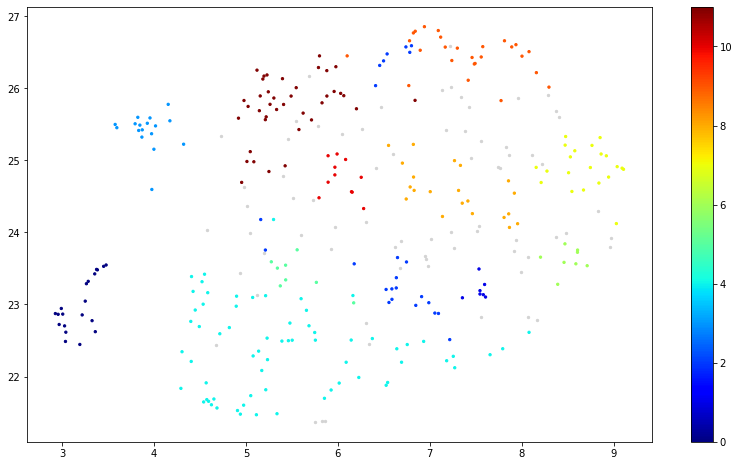

In [39]:
plot_clusters(embeddings_st1, cluster1[84])

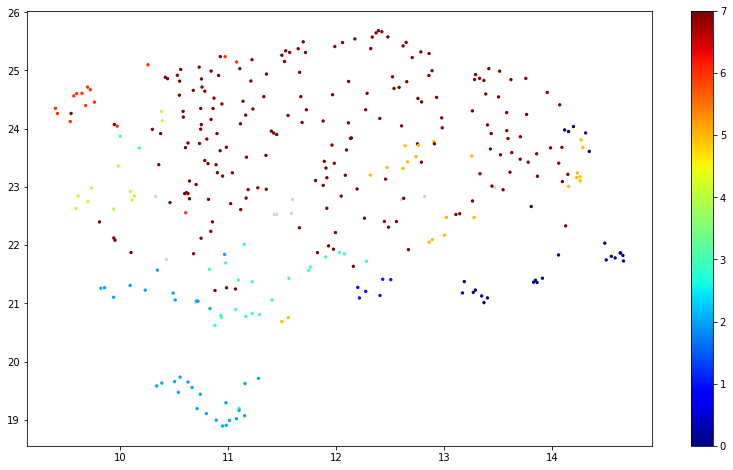

In [40]:
plot_clusters(embeddings_st2, cluster2[best2])

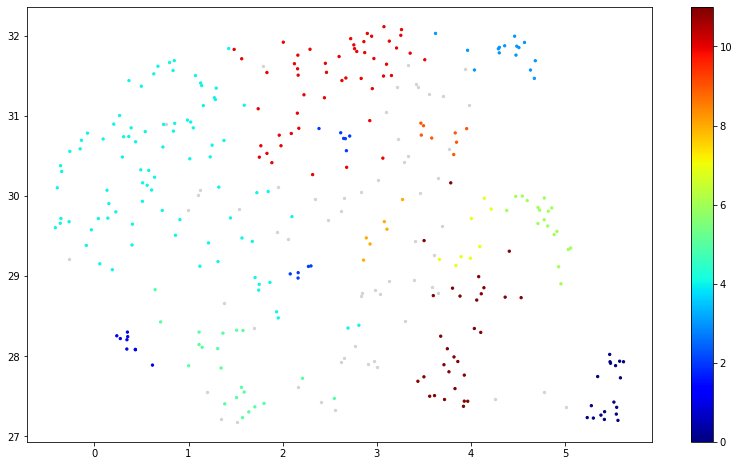

In [41]:
plot_clusters(embeddings_st3, cluster3[best3])

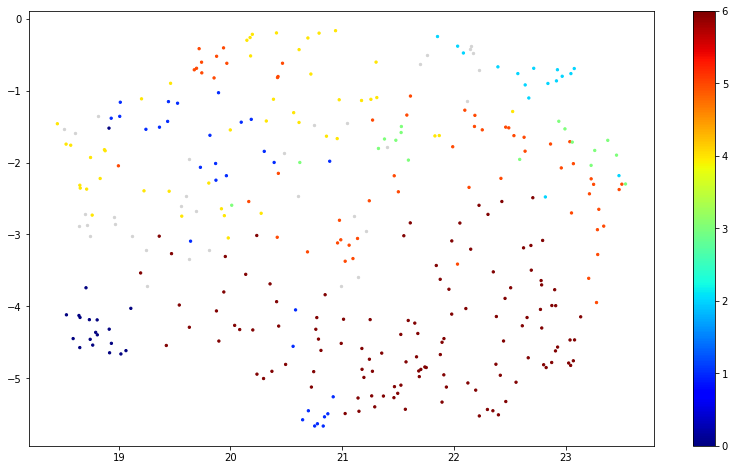

In [42]:
plot_clusters(embeddings_st4, cluster4[best4])

In [43]:
# checking how Restaurants with name having Pizza in them are clustered 
results_df[results_df['Restaurant'].str.contains("Pizza")]

,Restaurant,Menu,cluster_st1,cluster_st2,cluster_st3,cluster_st4
0,241 Pizza,"[Bacon Cheeseburger Pizza Medium Slice, Meat L...",3,6,3,1
3,Ameci Pizza & Pasta,"[Large Ameci Deluxe Pizza, Chicken Caesar Sala...",3,7,3,1
28,California Pizza Kitchen,[Crispy Thin Crust Pizza Roasted Garlic Chicken],3,6,3,1
168,Lit Pizza,"[Caesar, Here Today Gone to Maui 1 of 6 Slices...",3,3,-1,1
203,Nick-N-Willy's Pizza,"[Margherita Calzone TS, Garden Veggie Pizza Fa...",3,6,3,1
222,Pizza Pizza,"[Gluten Free Pizza Slice New York Pepperoni, X...",3,7,3,6
317,Vocelli Pizza,[Large Thin Crust Garlic Spinaci Pizza White S...,3,6,3,1


In [44]:
# checking how Restaurants with name having Burger in them are clustered 
results_df[results_df['Restaurant'].str.contains("Burger")]

,Restaurant,Menu,cluster_st1,cluster_st2,cluster_st3,cluster_st4
9,Back Yard Burgers,"[Classic Turkey Burger, Chili Cheese Fries La...",9,7,10,6
24,Burger King,[Cheesecake New York Style],-1,7,-1,2
119,Good Times Burgers & Frozen Custard,[Chocolate Peanut Butter Crunch Spoonbender Me...,9,7,10,6
293,The Habit Burger Grill,"[Strawberry Shake with Whipped Cream, Wheat Bu...",11,7,10,6
319,Wayback Burgers,"[Ranch Dipping Sauce, Kids Cheeseburger, Kids ...",11,7,10,6


In [48]:
# checking how Restaurants with name having Burger in them are clustered 
results_df[results_df['Restaurant'].str.contains("Grill")]

,Restaurant,Menu,cluster_st1,cluster_st2,cluster_st3,cluster_st4
142,Jack Astor's Bar & Grill,"[AddOn Buddha Salad, Chicken Wings Buffalo Sau...",9,7,-1,6
190,Moe's Southwest Grill,"[Breakfast Bowl Chicken Chilaquiles, Carnitas ...",2,7,-1,4
197,Moxie's Classic Grill,"[Citrus Arugula Salad, French Toast, The Black...",11,7,10,6
219,Pepperjax Grill,"[Junior Jax Pork Rice Bowl, Kids Mandarin Oran...",11,7,10,6
293,The Habit Burger Grill,"[Strawberry Shake with Whipped Cream, Wheat Bu...",11,7,10,6
